## Task 1: Data Understanding and Visualization:
Download the Provided Data and Complete the following task.

1. Load and visualize images from a dataset stored in directories, where each subdirec-
tory represents a class. You are expected to write a code:

• Get the list of class directories from the train folder.              
• Select one image randomly from each class.               
• Display the images in a grid format with two rows using matplotlib.


In [ ]:
from zipfile import ZipFile

with ZipFile('/content/FruitinAmazon.zip', 'r') as zip_ref:
    print(zip_ref.namelist())

['FruitinAmazon/test/cupuacu/download (5).jpeg', 'FruitinAmazon/test/acai/images (2).jpeg', 'FruitinAmazon/test/cupuacu/download (3).jpeg', 'FruitinAmazon/test/acai/images (16).jpeg', 'FruitinAmazon/test/pupunha/download (2).jpeg', 'FruitinAmazon/train/pupunha/images (1).jpeg', 'FruitinAmazon/test/cupuacu/download (2).jpeg', 'FruitinAmazon/test/pupunha/download (1).jpeg', 'FruitinAmazon/train/acai/images (3).jpeg', 'FruitinAmazon/train/acai/images (4).jpeg', 'FruitinAmazon/test/graviola/download (1).jpeg', 'FruitinAmazon/test/pupunha/download (11).jpeg', 'FruitinAmazon/test/pupunha/download (4).jpeg', 'FruitinAmazon/train/acai/images (11).jpeg', 'FruitinAmazon/test/tucuma/download (1).jpeg', 'FruitinAmazon/test/acai/images.jpeg', 'FruitinAmazon/train/acai/images (10).jpeg', 'FruitinAmazon/test/cupuacu/images (3).jpeg', 'FruitinAmazon/train/acai/images (13).jpeg', 'FruitinAmazon/test/tucuma/download (5).jpeg', 'FruitinAmazon/test/graviola/images (4).jpeg', 'FruitinAmazon/train/acai/imag

In [ ]:
with ZipFile('/content/FruitinAmazon.zip', 'r') as zip_ref:
    zip_ref.extractall()

['acai', 'cupuacu', 'graviola', 'guarana', 'pupunha', 'tucuma']


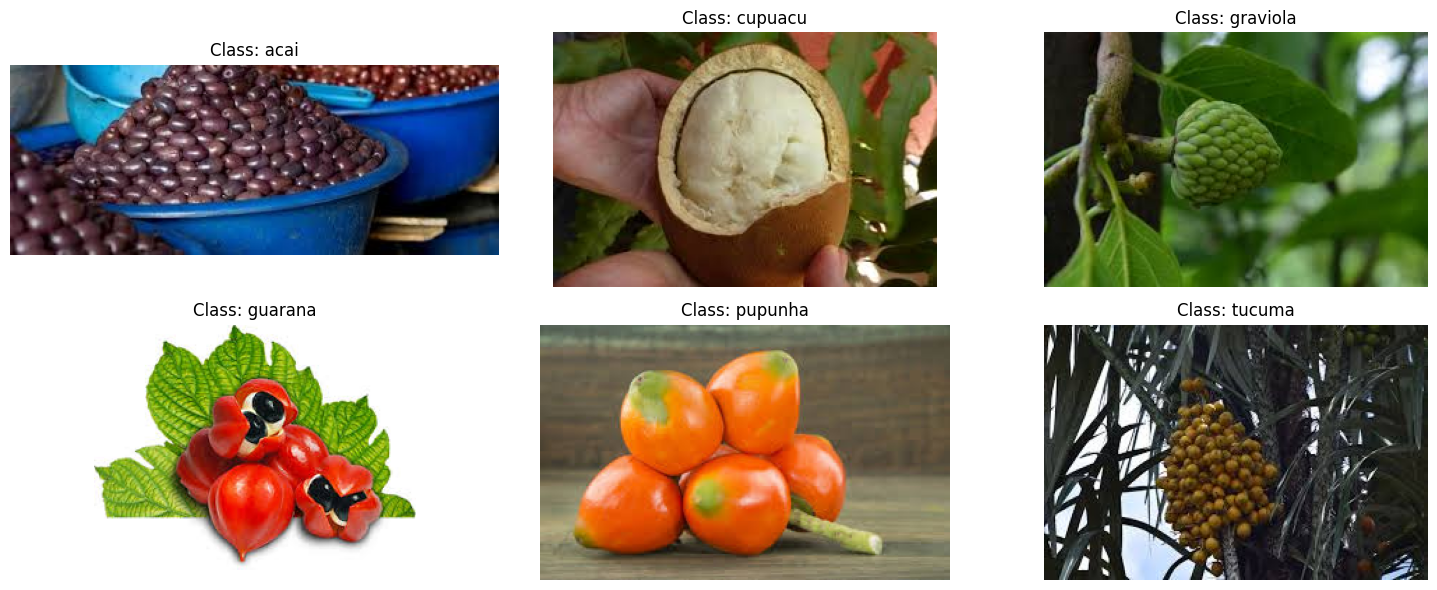

In [ ]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Define the train and test directory
train_dir = "/content/FruitinAmazon/train"  # Update path if needed
test_dir = "/content/FruitinAmazon/train"

# Get list of class directories
class_names = sorted(os.listdir(train_dir))

# Print the list of class names
print(class_names)

# Select one random image from each class
selected_images = []
selected_labels = []

for class_name in class_names:
    class_path = os.path.join(train_dir, class_name)
    image_files = os.listdir(class_path)

    if image_files:  # Ensure the folder is not empty
        random_image = random.choice(image_files)
        selected_images.append(os.path.join(class_path, random_image))
        selected_labels.append(class_name)

# Plot images in a grid format (two rows)
num_classes = len(selected_images)
cols = num_classes // 2  # 2 rows
rows = 2 if num_classes > 1 else 1  # Ensure at least 1 row

fig, axes = plt.subplots(rows, cols, figsize=(15, 6))

for i, ax in enumerate(axes.flat):
    if i < num_classes:
        img = Image.open(selected_images[i])
        ax.imshow(img, cmap="gray")
        ax.set_title(f"Class: {selected_labels[i]}")
        ax.axis("off")

plt.tight_layout()
plt.show()


#### 2. Check for Corrupted Image:
  Write a script that verifies whether the image in the train
  directory are valid. If any corrupted images are found, the script must remove the image from
  the directory and print the message which image have been removed, if none found print ”No
  Corrupted Images Found.”
  ##### • Hint:
  – Iterate through each class subdirectory and check if each image is valid.       
  – Use the Image.open() function to attempt to load each image.  
  – If the image is corrupted i.e. raises an IOError or SyntaxError, remove the image from
  the directory and print f"Removed corrupted image: {image_path}".   
  – Maintain a list of all corrupted image paths for reporting.   
  #### • Expected Output: No corrupted images found.

In [ ]:
corrupted_images = []

for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)
        try:
            with Image.open(image_path) as img:
                # If the image opens successfully, it's valid
                pass
        except (IOError, SyntaxError):
            # If an error occurs, the image is corrupted
            corrupted_images.append(image_path)
            os.remove(image_path)
            print(f"Removed corrupted image: {image_path}")

if not corrupted_images:
    print("No corrupted images found.")

No corrupted images found.


## Task 2: Loading and Preprocessing Image Data in keras:
In this section, we will load and preprocess image data from a directory using the
image dataset from directory function in Keras.

This function is used to load images from a directory structure where subdirectories represent different
classes. We will also apply basic preprocessing, including resizing and batching and normalization of
images. The same function can be used to load train and validation data.


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
# Define image size and batch size
img_height = 128 # Example image height
img_width = 128 # Example image width
batch_size = 32
validation_split = 0.2 # 80% training, 20% validation
# Create a preprocessing layer for normalization
rescale = tf.keras.layers.Rescaling(1./255) # Normalize pixel values to [0, 1]
# Create training dataset with normalization
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
train_dir,
labels='inferred',
label_mode='int',
image_size=(img_height, img_width),
interpolation='nearest',
batch_size=batch_size,
shuffle=True,
validation_split=validation_split,
subset='training',
seed=123
)
# Apply the normalization (Rescaling) to the dataset
train_ds = train_ds.map(lambda x, y: (rescale(x), y))
# Create validation dataset with normalization
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
train_dir,
labels='inferred',
label_mode='int',
image_size=(img_height, img_width),
interpolation='nearest',
batch_size=batch_size,
shuffle=False,
validation_split=validation_split,
subset='validation',
seed=123
)
# Apply the normalization (Rescaling) to the validation dataset
val_ds = val_ds.map(lambda x, y: (rescale(x), y))

Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.


## Task 3 - Implement a CNN with
Follow the following Structure and Hyper - parameters:     
Convolutional Architecture:  
• Convolutional Layer 1:  
  – Filter Size (F): (3, 3)   
  – Number of Filters (k): 32  
  – Padding (P): same  
  – Stride (s): 1  
• Activation Layer: ReLU activation  
• Pooling Layer 1: Max pooling  
– Filter Size (F): (2, 2)  
– Stride (s): 2  
• Convolutional Layer 2:  
– Filter Size (F): (3, 3)  
– Number of Filters (k): 32  
– Padding (P): same  
– Stride (s): 1  
• Activation Layer: ReLU activation  
• Pooling Layer 2: Max pooling  
– Filter Size (F): (2, 2)  
– Stride (s): 2  
###Fully Connected Network Architecture:  
• Flatten Layer: Flatten the input coming from the convolutional layers  
• Input Layer:  
• Hidden Layer - 2:  
– Number of Neurons: 64  
– Number of Neurons: 128  
• Output Layer:  
– Number of Neurons: num classes (number of output classes)

In [ ]:


# Define the CNN model
model = tf.keras.models.Sequential([
    # Convolutional Layer 1
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(img_height, img_width, 3)),

    # Pooling Layer 1
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Convolutional Layer 2
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),

    # Pooling Layer 2
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Flatten Layer
    tf.keras.layers.Flatten(),

    # Hidden Layer 1
    tf.keras.layers.Dense(64, activation='relu'),

    # Hidden Layer 2
    tf.keras.layers.Dense(128, activation='relu'),

    # Output Layer
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     2,097,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,116,454 (8.07 MB)

 Trainable params: 2,116,454 (8.07 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
#callbacks
callbacks = [
    keras.callbacks.ModelCheckpoint(filepath="model_at_epoch_{epoch}.keras"),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=5)
]

# Train the model
history = model.fit(train_ds,
          epochs=250,
          batch_size=16,
          callbacks=callbacks,
          validation_data=val_ds
          )
model.summary()

Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 658ms/step - accuracy: 0.1437 - loss: 1.8567 - val_accuracy: 0.8333 - val_loss: 1.3121
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 523ms/step - accuracy: 0.2730 - loss: 1.6624 - val_accuracy: 0.6111 - val_loss: 1.3693
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 569ms/step - accuracy: 0.3446 - loss: 1.4469 - val_accuracy: 0.7778 - val_loss: 1.3023
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 660ms/step - accuracy: 0.5621 - loss: 1.1692 - val_accuracy: 0.5000 - val_loss: 1.2711
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 516ms/step - accuracy: 0.7244 - loss: 0.8530 - val_accuracy: 0.7222 - val_loss: 0.7406
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 529ms/step - accuracy: 0.7765 - loss: 0.6724 - val_accuracy: 0.7778 - val_loss: 0.8141
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 516ms/step - accuracy: 0.9527 - loss: 0.4367 - val_accuracy: 0.8333 - val_loss: 0.7605
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 512ms/step - accuracy: 0.9783 - loss: 0.3433 - val_accuracy: 0.8889 - v

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     2,097,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,349,364 (24.22 MB)

 Trainable params: 2,116,454 (8.07 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,232,910 (16.15 MB)

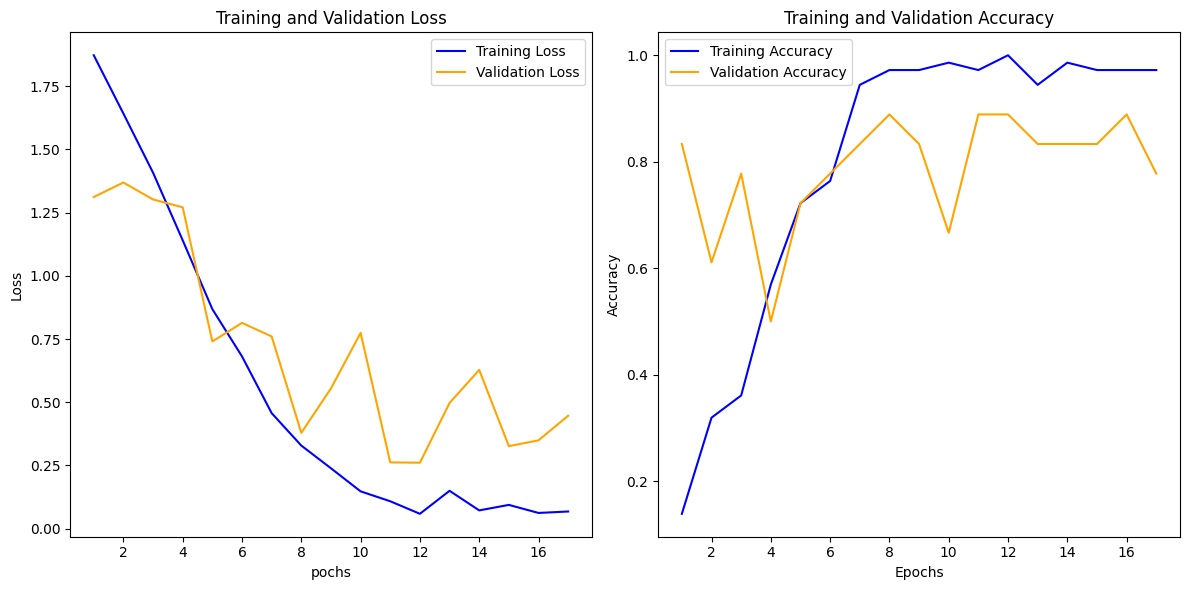

In [ ]:
import matplotlib.pyplot as plt
# Assuming ’history’ is the object returned by model.fit()
# Extracting training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
# Extracting training and validation accuracy (if metrics were specified)
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
# Plotting training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss', color='blue')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss', color='orange')
plt.xlabel('pochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy', color='blue')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(train_ds, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

3/3 - 0s - 162ms/step - accuracy: 1.0000 - loss: 0.0564
Test accuracy: 1.0000


In [ ]:
model.save('mnist_fully_connected_model.h5')
loaded_model = tf.keras.models.load_model('mnist_fully_connected_model.h5')

In [ ]:
loaded_model = tf.keras.models.load_model('mnist_fully_connected_model.h5')

In [ ]:

# Get the number of classes from the loaded model
# Use output.shape instead of output_shape
num_classes_model = loaded_model.layers[-1].output.shape[-1]  # Get from the output layer

# Create test dataset with the correct number of classes
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='int',  # Use 'categorical' if your labels are one-hot encoded
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False,
    seed=123
)

# Get the class names before applying .map()
num_classes_dataset = len(test_ds.class_names)  # Get class names here

# Apply the normalization (Rescaling) to the dataset
test_ds = test_ds.map(lambda x, y: (rescale(x), y))


# Check if the number of classes in the model and dataset match
# num_classes_dataset = len(test_ds.class_names)  <- Remove this line
# This works when `label_mode='int'`
# If `label_mode='categorical'`, then you should get the number of classes from the shape of y in the dataset.
if num_classes_model != num_classes_dataset:
    print(f"Warning: Model expects {num_classes_model} classes, but dataset has {num_classes_dataset} classes.")
    print("This might cause issues during evaluation.")
    # Potentially adjust the model or dataset to match the number of classes


# Evaluate the loaded model using the test set
test_loss, test_acc = loaded_model.evaluate(test_ds, verbose=2)
print(f"\nTest accuracy (loaded model): {test_acc:.4f}")

Found 90 files belonging to 6 classes.
3/3 - 1s - 392ms/step - accuracy: 0.8667 - loss: 0.5109

Test accuracy (loaded model): 0.8667


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 190ms/step
Found 90 files belonging to 6 classes.


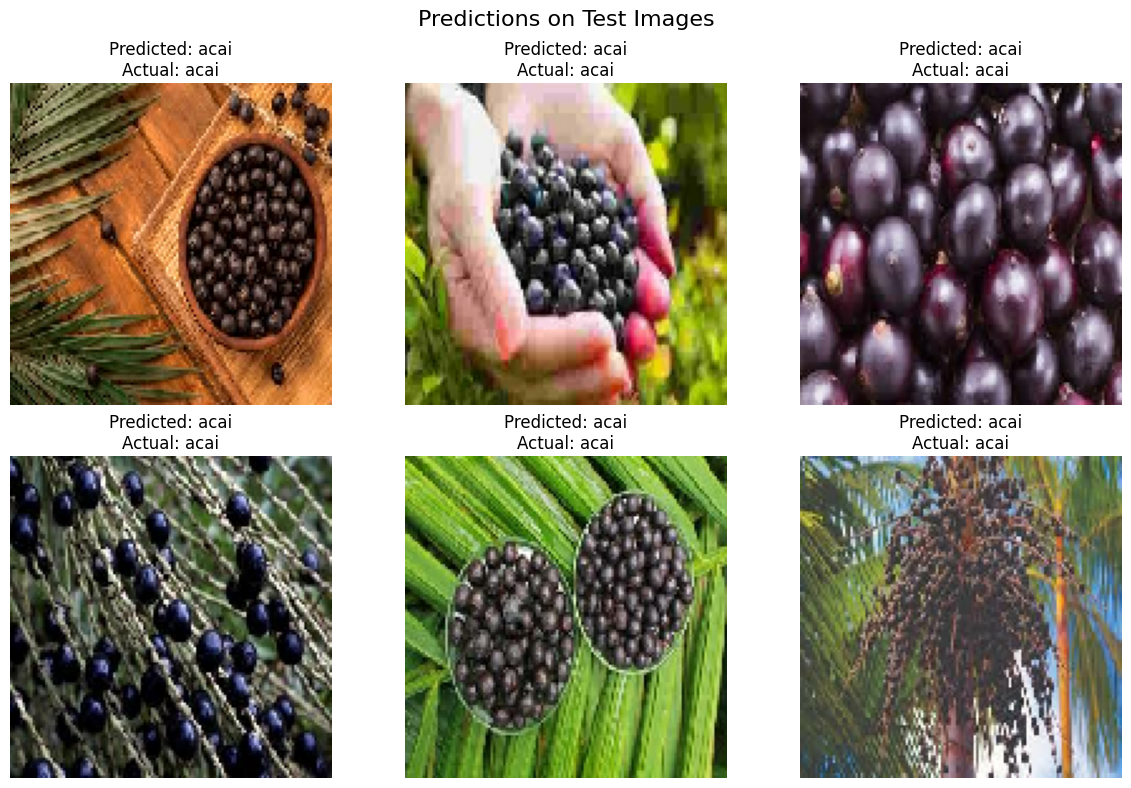

              precision    recall  f1-score   support

        acai       0.75      1.00      0.86        15
     cupuacu       0.88      0.93      0.90        15
    graviola       1.00      0.80      0.89        15
     guarana       0.93      0.87      0.90        15
     pupunha       0.80      0.80      0.80        15
      tucuma       0.92      0.80      0.86        15

    accuracy                           0.87        90
   macro avg       0.88      0.87      0.87        90
weighted avg       0.88      0.87      0.87        90



In [ ]:
import matplotlib.pyplot as plt
# Make predictions and display results
predictions = loaded_model.predict(test_ds)
predicted_labels = np.argmax(predictions, axis=1)

# Get images and labels from test_ds
test_images = []
test_labels_actual = []
for images, labels in test_ds.as_numpy_iterator():
    test_images.extend(images)
    test_labels_actual.extend(labels)
test_images = np.array(test_images)
test_labels_actual = np.array(test_labels_actual)

# Get the class names before applying .map()
# This will ensure class_names are available
class_names = loaded_model.layers[-1].output.shape[-1]  # Get class names here

# Create test dataset with the correct number of classes
test_ds_new = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='int',  # Use 'categorical' if your labels are one-hot encoded
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False,
    seed=123
)

class_names = test_ds_new.class_names  # Access class names directly


# Display the first 6 images with predictions and actual labels in a 2x3 grid
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
fig.suptitle("Predictions on Test Images", fontsize=16)

for i, ax in enumerate(axes.flat):
    if i < len(test_images):
        ax.imshow(test_images[i])
        predicted_label = predicted_labels[i]
        actual_label = test_labels_actual[i]

        # Use the class_names variable obtained earlier
        predicted_fruit_name = class_names[predicted_label]
        actual_fruit_name = class_names[actual_label]

        ax.set_title(f"Predicted: {predicted_fruit_name}\nActual: {actual_fruit_name}")
        ax.axis("off")
    else:
        ax.axis("off")

plt.tight_layout()
plt.show()

# Generate classification report
# Use the class_names variable obtained earlier
from sklearn.metrics import classification_report
print(classification_report(test_labels_actual, predicted_labels, target_names=class_names))

## Task - 1:
Repeat all the task from worksheet - 5 but, try to improve the model from last week with same dataset.   
• Use Data Augmentation to increase the number of training image.    
• Use deeper model with BN and DropOut layer as presented above.     
• Understand the Model Summary and Training Behavior.   

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/lambda_layer.py:65: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


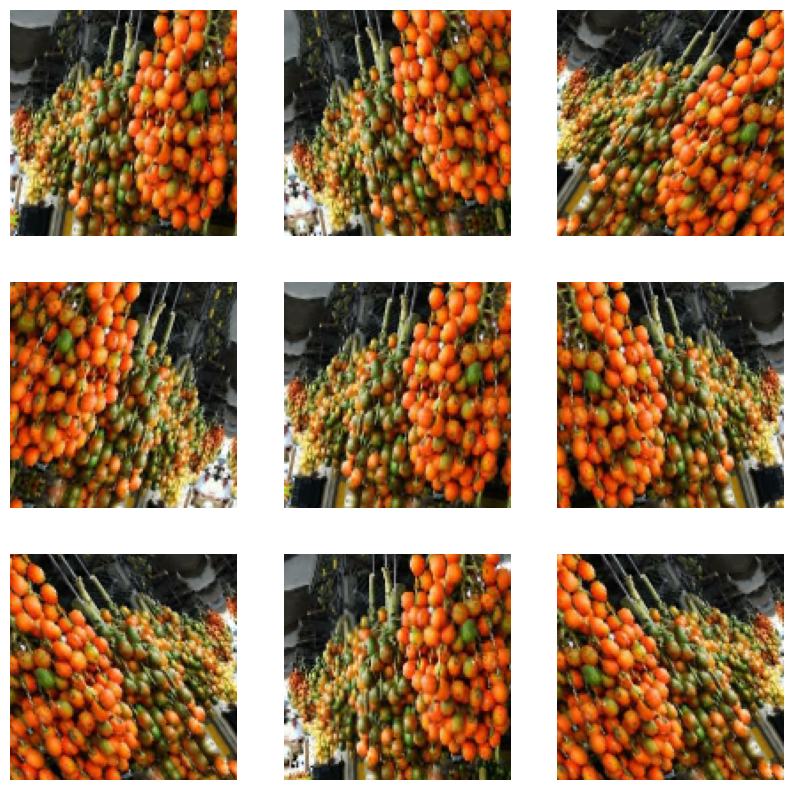

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Activation, Dropout, Lambda, Rescaling

# This is a sample implementation, Thus I only use two augmentation, you can use more than two augmentation type for your project.
# Please check keras documentations for other available augmentation techniques.
data_augmentation_layers = [
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.1),
]
def data_augmentation(images):
  for layer in data_augmentation_layers:
    images = layer(images)
  return images

# Define the model
model = tf.keras.Sequential([
    # Data augmentation applied using Lambda layer
    Lambda(data_augmentation, input_shape=(224, 224, 3)),
    # Rescaling layer to normalize pixel values
    Rescaling(1./255),
    # First Convolutional Block
    Conv2D(32, (3, 3), padding='same', activation=None),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    # Second Convolutional Block
    Conv2D(64, (3, 3), padding='same', activation=None),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    # Third Convolutional Block
    Conv2D(128, (3, 3), padding='same', activation=None),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    # Fourth Convolutional Block
    Conv2D(256, (3, 3), padding='same', activation=None),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    # Flatten the output of the last Conv2D layer
    Flatten(),
    # First Fully Connected Layer
    Dense(512, activation=None),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),
    # Second Fully Connected Layer
    Dense(256, activation=None),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),
    # Third Fully Connected Layer
    Dense(128, activation=None),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),
    # Fourth Fully Connected Layer
    Dense(64, activation=None),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),
    # Output Layer with 10 neurons (for classification task with 10 classes)
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Visualize the augmented image properly
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        img = augmented_images[0].numpy() * 255  # Unscale to [0, 255]
        plt.imshow(img.astype("uint8"))
        plt.axis("off")
plt.show()


In [ ]:
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(img_height, img_width, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # num_classes is the number of output classes
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 32, 32, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 512)            │    33,554,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 6)              │         3,078 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,932,678 (129.44 MB)

 Trainable params: 33,930,758 (129.44 MB)

 Non-trainable params: 1,920 (7.50 KB)

## Task - 2:
To - Do:   
• Implement transfer learning using a pre-trained model trained on ImageNet weights, freeze the
layers of the model, and fit it only on the output layer to classify the fruits dataset.   
• Evaluate the model’s performance and generate an inference output and classification report.   
• Did the performance improved compared to training from scratch.  

Expected Deliverables:   
• Trained Model: A trained model with the frozen layers and fine-tuned output layer.   
• Inference Output: Predicted class labels for the validation dataset.   
• Classification Report: A detailed classification report showing the performance of the model for
each class.

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Load pre-trained model with ImageNet weights
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Add new classification layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)  # Add a dense layer
predictions = Dense(num_classes, activation='softmax')(x)  # num_classes is the number of fruit classes

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Assuming you already have train_ds and val_ds defined

# Apply the data augmentation to training set using .map()
train_ds_augmented = train_ds.map(lambda x, y: (data_augmentation(x), y),
                                  num_parallel_calls=tf.data.AUTOTUNE)

# Prefetch to improve performance
train_ds_augmented = train_ds_augmented.prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(tf.data.AUTOTUNE)

history = model.fit(train_ds_augmented, epochs=10, validation_data=val_ds)  # Adjust epochs as needed

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step - accuracy: 0.1742 - loss: 2.4849

3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.1793 - loss: 2.5108 - val_accuracy: 0.7222 - val_loss: 0.8271
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 436ms/step - accuracy: 0.7040 - loss: 1.0027 - val_accuracy: 0.7778 - val_loss: 0.7182
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 474ms/step - accuracy: 0.9427 - loss: 0.1480 - val_accuracy: 0.7778 - val_loss: 1.0052
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 459ms/step - accuracy: 1.0000 - loss: 0.0311 - val_accuracy: 0.9444 - val_loss: 0.3753
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 449ms/step - accuracy: 0.9744 - loss: 0.1569 - val_accuracy: 0.9444 - val_loss: 0.2932
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 497ms/step - accuracy: 1.0000 - loss: 0.0333 - val_accuracy: 0.9444 - val_loss: 0.3851
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 455ms/step - accuracy: 0.9744 - loss: 0.0802 - val_accuracy: 0.8889 - val_loss: 0.4908
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 463ms/step - accuracy: 1.0000 - loss: 0.0072 - val_accuracy: 0.9444 - val_loss: 0.4092
Epoch

3/3 - 1s - 437ms/step - accuracy: 0.9222 - loss: 0.3184

Test accuracy: 0.9222


2/3 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step
              precision    recall  f1-score   support

        acai       1.00      1.00      1.00        15
     cupuacu       0.94      1.00      0.97        15
    graviola       0.94      1.00      0.97        15
     guarana       0.93      0.87      0.90        15
     pupunha       0.81      0.87      0.84        15
      tucuma       0.92      0.80      0.86        15

    accuracy                           0.92        90
   macro avg       0.92      0.92      0.92        90
weighted avg       0.92      0.92      0.92        90



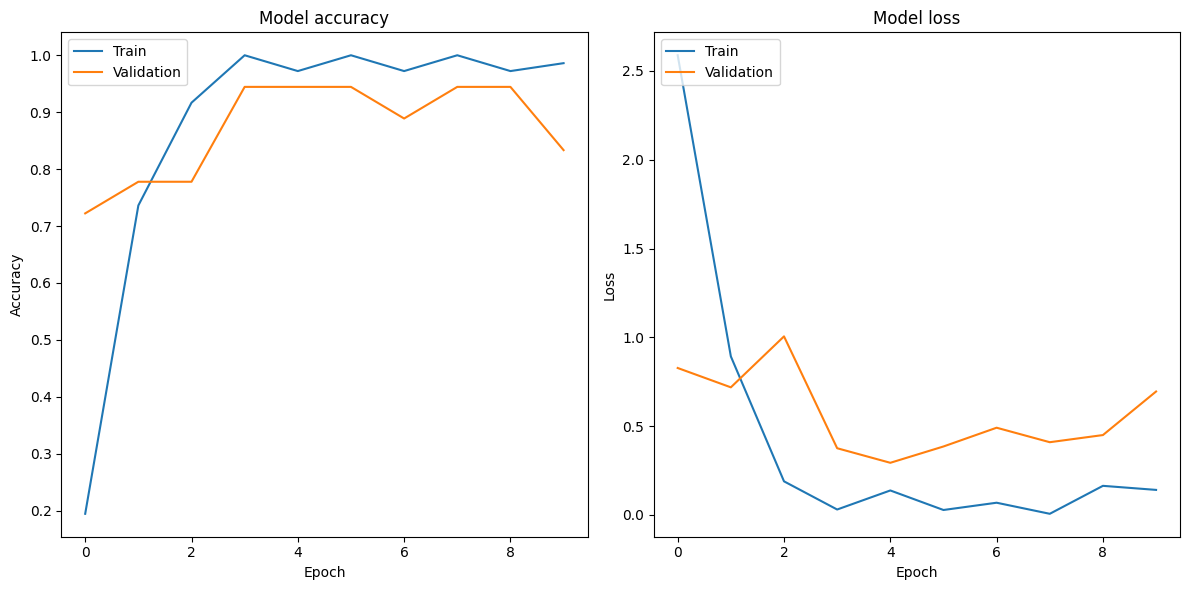

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_ds, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")

# Generate predictions (inference output)
predictions = model.predict(test_ds)
predicted_labels = np.argmax(predictions, axis=1)

# Generate classification report
from sklearn.metrics import classification_report
print(classification_report(test_labels_actual, predicted_labels, target_names=class_names))

import matplotlib.pyplot as plt

# Assuming 'history' is the object returned by model.fit()

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))  # Adjust figure size if needed

plt.subplot(1, 2, 1)  # Create a subplot for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)  # Create a subplot for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()